In [7]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#1(1)
dataset = pd.read_csv('wine.csv')
dataset.head(5)

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
#1(2)
from sklearn.model_selection import train_test_split
x = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
wine_data = pd.concat([x,y], axis=1)
wine_data = wine_data[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD of diluted wines','Proline','Target']]
X_train, X_test, y_train, y_test = train_test_split(
  wine_data[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD of diluted wines','Proline']],
  wine_data[['Target']], test_size=0.25, random_state=5)
X_train.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428


In [33]:
#1(3)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini')
tree.fit(X_train,y_train)
tree.predict(X_test)
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['Target'].values[i]:
        error+=1
print(error)

4


In [37]:
#1(4)
round(tree.score(X_test,y_test['Target']),4)

0.9111

In [46]:
#1(5)
new_wine = np.array([1.51, 1.73, 1.98, 20.15, 85, 2.2, 1.92, .32, 1.48, 2.94, 1, 3.57, 172])
re_wine= new_wine.reshape(1, -1)
tree.predict(re_wine)

array([2], dtype=int64)

In [139]:
#2(1)
dataset1 = pd.read_excel('income.xlsx')
dataset1.head(5)

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


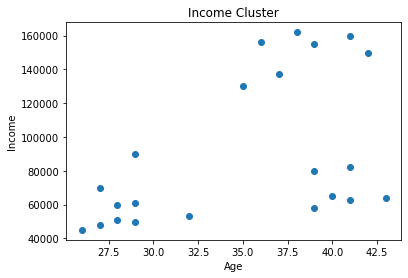

In [140]:
#2(2)
plt.scatter(dataset1.iloc[:,1],  dataset1.iloc[:,2])
plt.title('Income Cluster')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [141]:
#2(3)
from sklearn.cluster import KMeans
df1=dataset1.iloc[:,1:]
cluster=KMeans(n_clusters=3, random_state=0)
model=cluster.fit(df1)

In [142]:
#2(4)
df = pd.DataFrame(model.labels_, columns = ['cluster'])
df2 = pd.concat([dataset1,df], axis=1)
df2.head(5)

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


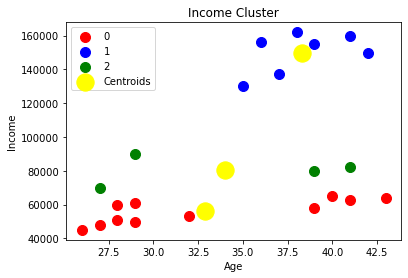

In [143]:
#2(5)
fs = df2[df2['cluster'].isin([0])]
nd = df2[df2['cluster'].isin([1])]
rd = df2[df2['cluster'].isin([2])]
plt.scatter(fs.iloc[:,1], fs.iloc[:,2], s = 100, c = 'red', label = '0')
plt.scatter(nd.iloc[:,1], nd.iloc[:,2], s = 100, c = 'blue', label = '1')
plt.scatter(rd.iloc[:,1], rd.iloc[:,2], s = 100, c = 'green', label = '2')
plt.scatter(cluster.cluster_centers_[:, 0],  cluster.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Income Cluster')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [144]:
#2(6)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
minmax = preprocessing.MinMaxScaler()
data_minmax = minmax.fit_transform(df1)
df5 = pd.DataFrame(data_minmax, columns = ['Age','Income'])
df5.head(5)

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [145]:
#2(7)
cluster=KMeans(n_clusters=3, random_state=0)
model=cluster.fit(df5)

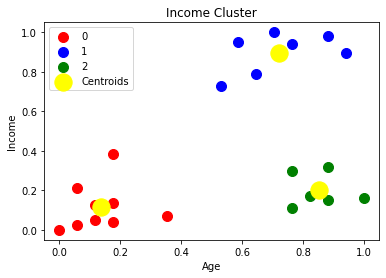

In [146]:
#2(8)
df6 = pd.DataFrame(model.labels_, columns = ['cluster'])
df7 = pd.concat([df5,df6], axis=1)
fs = df7[df7['cluster'].isin([0])]
nd = df7[df7['cluster'].isin([1])]
rd = df7[df7['cluster'].isin([2])]
plt.scatter(fs.iloc[:,0], fs.iloc[:,1], s = 100, c = 'red', label = '0')
plt.scatter(nd.iloc[:,0], nd.iloc[:,1], s = 100, c = 'blue', label = '1')
plt.scatter(rd.iloc[:,0], rd.iloc[:,1], s = 100, c = 'green', label = '2')
plt.scatter(cluster.cluster_centers_[:, 0],  cluster.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Income Cluster')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

D:\Users\leon8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Users\leon8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\leon8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\Users\leon8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated i

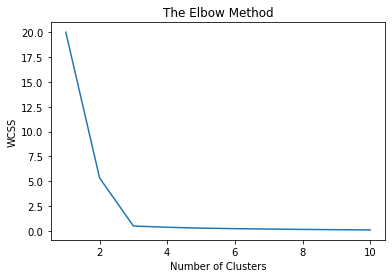

In [148]:
#2(10)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=0, n_jobs=-1)
    kmeans.fit(df7)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

array([ 56136.36363636, 150000.        ,  80500.        ])